In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Missing data 
Missing data occurs when values are simply abscent or contain NaN (not a number) for any feature (column) in a given dataset. This will cause issues with many machine learning algorithms.

**Missing data can negativly impact impact:**
- Data visualization
- Arithemetic computations
- Machine learning algorithms

**Common methods to deal with missing data:**
- Remove rows or columns containg missing data
- Impute with mean or median
- Impute with mode (most frequently occuring feature)
- Impute with forward or backward fill
- Interpolate data between two points 

*Note: Domain knowledge is often needen to decide how to fill nulls.*

In [2]:
df = pd.DataFrame(np.random.randn(10, 4), columns = ["A", "B", "C", "D"])
df = df[df > 0]
df

,A,B,C,D
0,NaN,NaN,0.605926,NaN
1,NaN,NaN,1.140041,0.730571
2,NaN,NaN,NaN,0.281605
3,NaN,NaN,NaN,NaN
4,0.302908,0.613624,NaN,1.382409
5,NaN,NaN,NaN,NaN
6,NaN,1.161699,NaN,NaN
7,0.810785,NaN,0.429994,0.717389
8,NaN,NaN,NaN,NaN
9,0.330677,NaN,NaN,2.062217


In [3]:
copy = df.copy()
copy.drop(columns="D", inplace=True)
copy

,A,B,C
0,NaN,NaN,0.605926
1,NaN,NaN,1.140041
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,0.302908,0.613624,NaN
5,NaN,NaN,NaN
6,NaN,1.161699,NaN
7,0.810785,NaN,0.429994
8,NaN,NaN,NaN
9,0.330677,NaN,NaN


### dropna
Remove rows (default) or columns, containing null.

**Parameters:**
- **how** = "any" (default) or "all"
- **thresh** = set number of NaN values a row must contain in order to *not* drop
- **subset** = Only look for NaN in subset of columns or rows
- **axis** = "index" (default) or "columns"

In [4]:
#copy.isna()
#copy.dropna() drops all rown containg NaN
#copy.dropna(how="all") drops only if all is NaN
#copy.dropna(thresh=2) choose number of NaNs 
#copy.dropna(subset=["A", "C"]) Choose columns to drop NaN in. Single or list
copy.dropna(axis="columns", subset=2)

""
0
1
2
3
4
5
6
7
8
9


### fillna

Fill missing values.

In [5]:
copy = df.copy()
copy

,A,B,C,D
0,NaN,NaN,0.605926,NaN
1,NaN,NaN,1.140041,0.730571
2,NaN,NaN,NaN,0.281605
3,NaN,NaN,NaN,NaN
4,0.302908,0.613624,NaN,1.382409
5,NaN,NaN,NaN,NaN
6,NaN,1.161699,NaN,NaN
7,0.810785,NaN,0.429994,0.717389
8,NaN,NaN,NaN,NaN
9,0.330677,NaN,NaN,2.062217


In [6]:
#copy.fillna(0)
copy["A"].fillna(copy["A"].median(), inplace=True)
#copy["B"].mode() # Mainly for categorical data
copy["C"].ffill(inplace=True)
#copy["D"].bfill()
copy["D"].interpolate(inplace=True)
copy

,A,B,C,D
0,0.330677,NaN,0.605926,NaN
1,0.330677,NaN,1.140041,0.730571
2,0.330677,NaN,1.140041,0.281605
3,0.330677,NaN,1.140041,0.832007
4,0.302908,0.613624,1.140041,1.382409
5,0.330677,NaN,1.140041,1.160736
6,0.330677,1.161699,1.140041,0.939063
7,0.810785,NaN,0.429994,0.717389
8,0.330677,NaN,0.429994,1.389803
9,0.330677,NaN,0.429994,2.062217


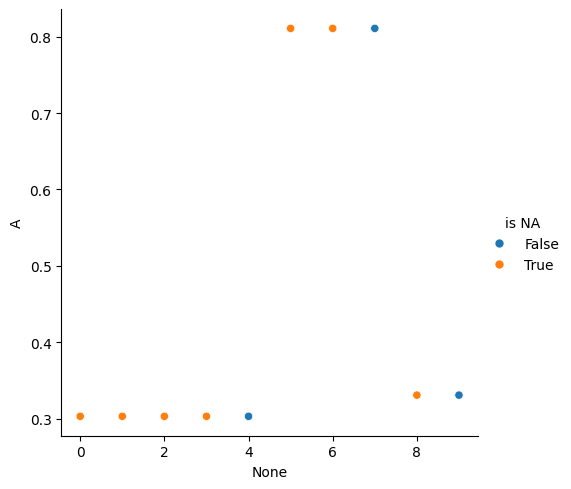

In [14]:
copy = df.copy()
copy["is NA"] = copy["A"].isna()
copy["A"].bfill(inplace=True)
sns.relplot(x=copy.index, y="A", hue="is NA", data=copy)